### Workflow

Workflow

1. x - Upload the dataset from MelanomaDetection.zip to the GPU server. Note that strictly speaking, you do not have to use a GPU for completing this milestone. This step’s objective is to make sure that you know how to get your dataset onto wherever your GPU is, and access it from there.

2. x - Write a custom class for the unlabeled images that inherits `torch.utils.data.Dataset` and overrides the following methods:
   * `__init__(self, dir_path, transform=None)`: the constructor should take in a path to the directory containing images and an optional transform argument for image pre-processing and augmentation.
   * `__len__(self)`: should return the number of images in the dataset.
   * `__getitem__(self, i)`: should return the ith image in the set.


3. x - Write a custom class for the labeled images that inherits `torch.utils.data.Dataset` and overrides the following methods:
   * `__init__(self, dir_path, transform=None)`: the constructor should take in a path to the directory containing images and an optional transform argument for image pre-processing and augmentation
   * `__len__(self)`: should return the number of images in the dataset
   * `__getitem__(self, i)`: should return the ith image in the set as well as its label


4. x -Instantiate both classes and create two torch.utils.data.DataLoader objects (for the unlabeled and labeled datasets respectively). Use them to print out one batch of data each.

5. After looking at the images, what transformations do you propose to use for the pre-processing and the data augmentation?

### Resources

* https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
* https://nanonets.com/blog/data-augmentation-how-to-use-deep-learning-when-you-have-limited-data-part-2/
* Manning Chapters - PyTorch Book
  - Augmentation - https://livebook.manning.com/book/deep-learning-with-pytorch/chapter-12
  - DataLoading - https://livebook.manning.com/book/deep-learning-with-pytorch/chapter-10

### Download the Data

In [1]:
url = 'https://liveproject-resources.s3.amazonaws.com/other/MelanomaDetection.zip'
pth = './data/MelanomaDetection.zip'
unp = './data/MelanomaDetection'


In [2]:
import torch
import torchvision
from torchvision import transforms, utils

import urllib.request
import os.path
import re
from zipfile import ZipFile
from skimage import io
import matplotlib.pyplot as plt
import numpy as np


from torch.utils.data import Dataset, DataLoader

if not os.path.exists(pth):
    urllib.request.urlretrieve(url, pth)
    with ZipFile(pth, 'r') as zipObj:
        zipObj.extractall('./data')


### Write an Unlabeled Dataset Class

In [4]:


class MLUnlabeled(Dataset):
    
    def __init__(self, dir_path, transform=None):
        self.dir_path = dir_path
        self.transform = transform
        
        files = os.listdir(dir_path)
        self.images = [ io.imread(dir_path+'/'+f) for f in files if re.search('.jpg$', f)]
    
    def __getitem__(self, i):
        
        ia = self.images[i]
        
        it = self.transform(ia) if self.transform else ia

        
        return it
    
    def __len__(self):
        return len(self.images)

### Write an Labeled Dataset Class

In [5]:
class MILabeled(Dataset):
    def __init__(self, dir_path, transform=None):
        
        self.transform = transform
        self.dir_path  = dir_path
        self.transform = transform
        
        files = os.listdir(dir_path)
        self.labeled_images = list(filter(None, [self._parse_files(f) for f in files]))    
          
    def __getitem__(self, i):
        
        (label, ia) = self.label_images[i]
        
        it = self.transform(ia) if self.transform else ia
        
        return (label, it)
    
    def _parse_files(self, fn):
        
        pth = self.dir_path + '/' + fn
        #fn  = os.path.basename(pth)
        m   = re.search(r'_(\d)\.', fn)
        if m:
            label = int(m.group(1))
            f_arr  = io.imread(pth)
            return (label, f_arr)
            
            
        return None
        
    
    def __len__(self,i):
        len(self.labeled_images)
    
   

In [6]:
class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, item):

        if type(item) is tuple:
            img, label = item
        else:
            img = item
            
        img = torch.from_numpy(img.transpose(2,0,1))
        
        return (img, label) if type(item) is tuple else img

### Instantiate Datasets and DataLoaders

In [7]:
bs=10
unlabeled_ds = MLUnlabeled(unp+'/unlabeled', ToTensor())
labeled_ds = MILabeled(unp + '/labeled', ToTensor())

u_dl = DataLoader(unlabeled_ds, batch_size=bs)
l_dl = DataLoader(labeled_ds, batch_size=bs)

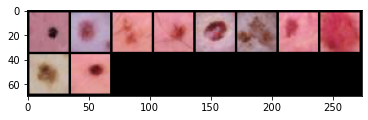

In [8]:
#print one batch each

u_batch_list = list(u_dl)
b1 = u_batch_list[0]
b1.shape

plt.imshow(torchvision.utils.make_grid(b1).permute(1,2,0).numpy())


### Transforms

Transforms that make sense are

* rotation
* mirroring (horizontal and vertical axis)
* randomApply combine a few transformations.

Transforms I'd skip are 

* Scaling (you could end up taking edges out of the photo)
* Shifting (you could take an edge out of the frame)

Transforms I'm not sure about

* Noise 

See - https://pytorch.org/docs/stable/torchvision/transforms.html

In [9]:

unlabeled_ds = MLUnlabeled(unp+'/unlabeled', transforms.Compose([
                                                            ToTensor(),
                                                            transforms.RandomRotation(359)]))


## Testing

In [10]:
unlabeled_ds = MLUnlabeled(unp+'/unlabeled')

In [11]:
unlabeled_ds[2]

array([[[234, 158, 171],
        [232, 156, 168],
        [229, 151, 164],
        ...,
        [246, 161, 166],
        [244, 159, 164],
        [241, 156, 161]],

       [[233, 157, 169],
        [226, 150, 162],
        [227, 150, 160],
        ...,
        [243, 158, 163],
        [240, 155, 160],
        [238, 153, 158]],

       [[230, 154, 164],
        [222, 146, 156],
        [226, 149, 157],
        ...,
        [238, 156, 160],
        [236, 154, 158],
        [234, 152, 156]],

       ...,

       [[223, 141, 143],
        [227, 145, 147],
        [229, 147, 149],
        ...,
        [227, 150, 144],
        [224, 147, 141],
        [221, 142, 137]],

       [[227, 142, 145],
        [230, 148, 150],
        [231, 149, 151],
        ...,
        [228, 151, 145],
        [226, 149, 143],
        [225, 146, 141]],

       [[228, 143, 146],
        [231, 149, 151],
        [233, 151, 153],
        ...,
        [228, 151, 145],
        [228, 151, 145],
        [228, 149, 144]]

In [14]:
labeled_ds = MILabeled(unp + '/labeled')

In [15]:
labeled_ds[2]

AttributeError: 'MILabeled' object has no attribute 'label_images'

What size are the images? 

In [17]:
unlabeled_ds[0].shape

(32, 32, 3)